In [3]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Partial Least Sqaures Regression

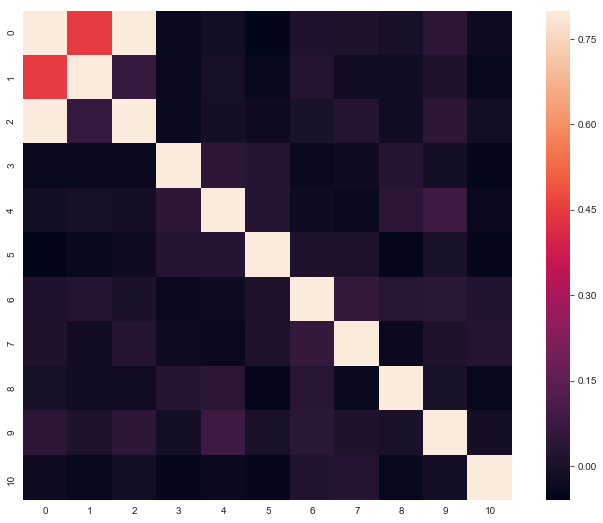

In [4]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8442427002740239
R-squared PLSR: 0.8442424548091989


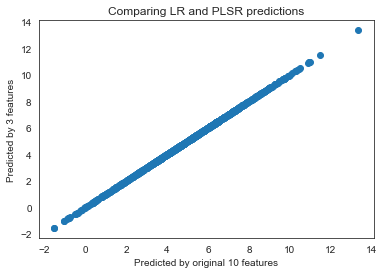

In [5]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

# create new partial least square regressions with different numbers of components
Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

R-squared regression: 0.8442427002740239
R-squared PLSR: 0.8442427002606615


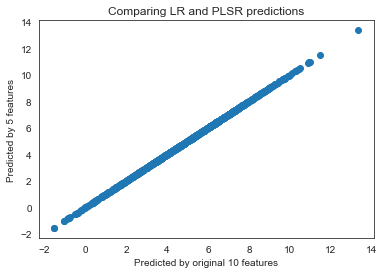

R-squared PLSR: 0.844209589551836


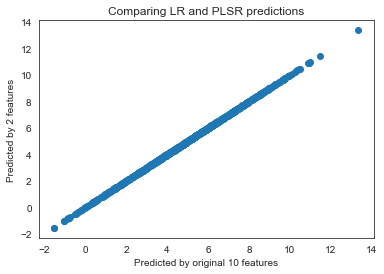

In [6]:
# Your PLSR models here.
# change number of components
#4 components
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Change feature space to 5 dimensions.
pls5 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls5.fit(X, y)

# Save predicted values.
Y_PLS_5_pred = pls5.predict(X)
print('R-squared PLSR:', pls5.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_5_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

#2 components
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 2 dimensions.
pls2 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_2_pred = pls2.predict(X)
print('R-squared PLSR:', pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_2_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.6266192477396058
R-squared PLSR: 0.6266190909634093


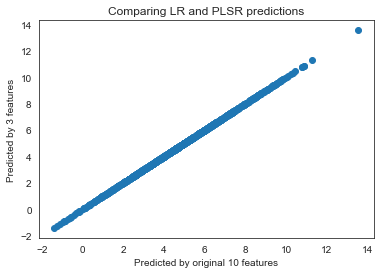

In [7]:
#Changing how y is computed
#Using random logistic for y
#https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.logistic.html
y_logistic = X[:, 0] + 2 * X[:, 1] + np.random.logistic(size = n * 1) + 5
regr.fit(X, y_logistic)

# Save predicted values.
Y_pred_logistic = regr.predict(X)
print('R-squared regression:', regr.score(X, y_logistic))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls_logistic = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls_logistic.fit(X, y_logistic)

# Save predicted values.
Y_PLS_pred_logistic = pls_logistic.predict(X)
print('R-squared PLSR:', pls_logistic.score(X, y_logistic))

# Compare the predictions of the two models
plt.scatter(Y_pred_logistic,Y_PLS_pred_logistic)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()